In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
movie = pd.read_csv(r"movie_data\movies.csv")

In [27]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# What is the shape of "movies.csv"?

In [28]:
movie.shape

(9742, 3)

In [54]:
links = pd.read_csv(r"movie_data\links.csv")

In [127]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [29]:
rating = pd.read_csv(r"movie_data\ratings.csv")

In [30]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# What is the shape of "ratings.csv"?

In [31]:
rating.shape

(100836, 4)

# How many unique "userId" are available in "ratings.csv"?

In [36]:
rating['userId'].nunique()

610

In [39]:
merged_data = pd.merge(movie,rating,left_on='movieId', right_on='movimerged_data eId',how='inner')

In [40]:
merged_data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [41]:
merged_data.shape

(100836, 6)

In [56]:
links.shape

(9742, 3)

In [58]:
merged_data = pd.merge(merged_data,links,left_on='movieId', right_on='movieId',how='inner')

In [72]:
tags = pd.read_csv(r"movie_data\tags.csv")

In [74]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [78]:
tags.shape

(3683, 4)

In [85]:
merged_data = pd.merge(merged_data,tags,left_on='movieId', right_on='movieId',how='inner')

In [86]:
merged_data.head()

,movieId,title,genres,userId_x,rating,timestamp_x,imdbId,tmdbId,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,474,pixar,1137206825


In [61]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
 6   imdbId     100836 non-null  int64  
 7   tmdbId     100823 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 6.9+ MB


In [66]:
merged_data['title'].value_counts()

Forrest Gump (1994)                      329
Shawshank Redemption, The (1994)         317
Pulp Fiction (1994)                      307
Silence of the Lambs, The (1991)         279
Matrix, The (1999)                       278
                                        ... 
We're Back! A Dinosaur's Story (1993)      1
American Hardcore (2006)                   1
Shanghai Surprise (1986)                   1
Let's Get Harry (1986)                     1
Andrew Dice Clay: Dice Rules (1991)        1
Name: title, Length: 9719, dtype: int64

# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [88]:
Matrix= merged_data[(merged_data['title']== "Matrix, The(1999)")]['tag']
Matrix

142140          martial arts
142141                sci-fi
142142    alternate universe
142143            philosophy
142144      post apocalyptic
                 ...        
143525          martial arts
143526                sci-fi
143527    alternate universe
143528            philosophy
143529      post apocalyptic
Name: tag, Length: 1390, dtype: object

# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [96]:
terminator_df = merged_data[merged_data['title'] == 'Terminator 2: Judgment Day (1991)']
average_rating = terminator_df['rating'].mean()
print(average_rating)

3.970982142857143


# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

<AxesSubplot:xlabel='rating', ylabel='Density'>

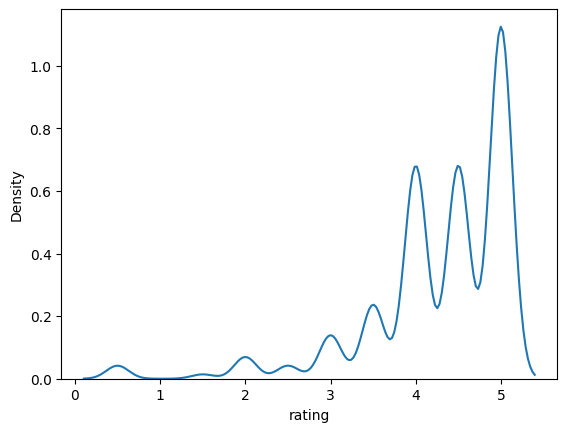

In [107]:
data = merged_data[merged_data["title"]=='Fight Club (1999)']
sns.kdeplot(data["rating"])

# Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50)

In [108]:
grouped_ratings = rating.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

print(grouped_ratings)

      movieId  count      mean
0           1    215  3.920930
1           2    110  3.431818
2           3     52  3.259615
3           4      7  2.357143
4           5     49  3.071429
...       ...    ...       ...
9719   193581      1  4.000000
9720   193583      1  3.500000
9721   193585      1  3.500000
9722   193587      1  3.500000
9723   193609      1  4.000000

[9724 rows x 3 columns]


In [118]:
# Step 2: Apply inner join on dataframe created from movies.csv and the grouped df from step 1
merged_df = pd.merge(movie, grouped_ratings, on='movieId', how='inner')

print(merged_df)

# Step 3: Filter only those movies which have more than 50 user ratings
filtered_df = merged_df[merged_df['count'] > 50]

# Display the resulting DataFrame
print(filtered_df)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9719   193581  Black Butler: Book of the Atlantic (2017)   
9720   193583               No Game No Life: Zero (2017)   
9721   193585                               Flint (2017)   
9722   193587        Bungo Stray Dogs: Dead Apple (2018)   
9723   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  count      mean  
0     Adventure|Animation|Children|Comedy|Fantasy    215  3.920930  
1                      Adventure|Children|Fantasy    110  3.431818  
2                                  Comedy|Romance     52  3.259615  
3  

In [124]:
filtered_df

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


# Which movie is the most popular based on  average user ratings?

In [114]:
df['mean'].max()

4.429022082018927

In [112]:
df[filtered_df['mean']==4.429022082018927]

,movieId,title,genres,count,mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022


# Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [125]:
top_5_movies = filtered_df.nlargest(5, 'count')

# Display the resulting DataFrame
top_5_movies

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


# Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [120]:
sci_fi_movies = filtered_df[merged_df['genres'].str.contains('Sci-Fi')]

C:\Users\Abinay Rachakonda\AppData\Local\Temp\ipykernel_42764\3618627676.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sci_fi_movies = filtered_df[merged_df['genres'].str.contains('Sci-Fi')]


In [126]:
sci_fi_movies.head() 

,movieId,title,genres,count,mean
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177,3.983051
133,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
145,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355
176,208,Waterworld (1995),Action|Adventure|Sci-Fi,115,2.913043


In [122]:
top_5_movies = sci_fi_movies.nlargest(5, 'count')

# Display the resulting DataFrame
top_5_movies

,movieId,title,genres,count,mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640


In [133]:
merged_df2 = pd.merge(filtered_df,links , on='movieId', how='inner')
merged_df2

,movieId,title,genres,count,mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [134]:
a=merged_df2['imdbId']
b=list(a)
b

[114709,
 113497,
 113228,
 113277,
 114319,
 113189,
 112346,
 112641,
 114388,
 112281,
 113161,
 113627,
 114746,
 112431,
 112818,
 112697,
 114369,
 114148,
 114814,
 113862,
 116367,
 115759,
 116483,
 112573,
 75314,
 115685,
 112442,
 112384,
 112462,
 112642,
 112715,
 112740,
 112851,
 112864,
 113071,
 113481,
 113492,
 113957,
 114898,
 109445,
 109635,
 109686,
 109707,
 110148,
 76759,
 110322,
 110632,
 114069,
 110413,
 110912,
 110932,
 111282,
 111070,
 111161,
 111280,
 108550,
 114924,
 109040,
 109444,
 109446,
 109506,
 109830,
 109831,
 110357,
 110475,
 110478,
 110622,
 111257,
 111503,
 106220,
 109254,
 109439,
 106582,
 106598,
 106673,
 106697,
 106918,
 106977,
 107144,
 107206,
 107290,
 107362,
 107614,
 107818,
 107822,
 107977,
 108052,
 108160,
 83658,
 107688,
 108333,
 108358,
 108399,
 99785,
 99653,
 103639,
 103064,
 99348,
 96895,
 102926,
 29583,
 101414,
 32910,
 100405,
 116282,
 117060,
 116136,
 117705,
 117979,
 117500,
 117998,
 57012,
 1

# scrapping the IMDB reviews of each movie with more than 50 user ratings

In [136]:
reviews=[]
rating=[]
for i in b:
    id=str(i)
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    print(response)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find_all('a',class_='ipc-link ipc-link--baseAlt ipc-link--touch-target sc-9e83797f-2 cfrylA isReview' )
    import re
    res=[]
    for i in imdb_rating:
        a=i.find('span',class_='score')
        print(i)
        if a:
            regex=re.findall('\d+',a.text)
            res.append(regex[0])
        else:
            res.append(np.nan)
    reviews.append(res[0])
    imdb_ratings = soup.find('span',class_='sc-bde20123-1 cMEQkK')
    for i in imdb_ratings:
        rating.append(i)


<Response [200]>
<a aria-disabled="false" class="ipc-link ipc-link--baseAlt ipc-link--touch-target sc-9e83797f-2 cfrylA isReview" href="/title/tt0114709/reviews/?ref_=tt_ov_rt" role="button" tabindex="0"><span class="three-Elements"><span class="score">778</span><span class="label">User reviews</span></span></a>
<a aria-disabled="false" class="ipc-link ipc-link--baseAlt ipc-link--touch-target sc-9e83797f-2 cfrylA isReview" href="/title/tt0114709/externalreviews/?ref_=tt_ov_rt" role="button" tabindex="0"><span class="three-Elements"><span class="score">168</span><span class="label">Critic reviews</span></span></a>
<a aria-disabled="false" class="ipc-link ipc-link--baseAlt ipc-link--touch-target sc-9e83797f-2 cfrylA isReview" href="/title/tt0114709/criticreviews/?ref_=tt_ov_rt" role="button" tabindex="0"><span class="three-Elements"><span class="score"><span class="sc-b0901df4-0 bcQdDJ metacritic-score-box" style="background-color:#54A72A">96</span></span><span class="label"><span class=

In [137]:
merged_df2

,movieId,title,genres,count,mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [139]:
merged_df2['rating']= rating
merged_df2['reviews']= reviews

In [140]:
merged_df2['rating']= merged_df2['rating'].astype('float64')

# Mention the movieId of the movie which has the highest IMDB rating

In [141]:
top_5_movies = merged_df2.nlargest(5, 'rating')

# Display the resulting DataFrame
top_5_movies

,movieId,title,genres,count,mean,imdbId,tmdbId,rating,reviews
53,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,111161,278.0,9.3,10
117,858,"Godfather, The (1972)",Crime|Drama,192,4.289062,68646,238.0,9.2,5
86,527,Schindler's List (1993),Drama|War,220,4.225000,108052,424.0,9.0,2
146,1203,12 Angry Men (1957),Drama,57,4.149123,50083,389.0,9.0,2
156,1221,"Godfather: Part II, The (1974)",Crime|Drama,129,4.259690,71562,240.0,9.0,1


# Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [142]:
sci_fi_movies2 = merged_df2[merged_df2['genres'].str.contains('Sci-Fi')]

In [143]:
top_5_movies = sci_fi_movies2.nlargest(5, 'rating')

# Display the resulting DataFrame
top_5_movies

,movieId,title,genres,count,mean,imdbId,tmdbId,rating,reviews
424,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143,4.066434,1375666,27205.0,8.8,4
140,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640,80684,1891.0,8.7,1
248,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446,133093,603.0,8.7,4
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7,5
44,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076,76759,11.0,8.6,2
